Importing libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

Importing Dataset

In [5]:
df = pd.read_csv('./flight_review.csv', on_bad_lines='warn')
df.style.highlight_null('red')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


<AxesSubplot:xlabel='satisfaction', ylabel='Count'>

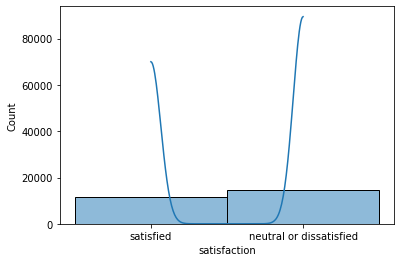

In [4]:
sns.histplot(df['satisfaction'],kde=True) 

In [6]:
df = df.drop(columns=['id', 'Unnamed: 0'])

EDA

In [7]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
# give statistical data about csv
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [10]:
df.corr()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099409,0.009242,0.032449,0.013565,0.003308,0.023841,0.202058,0.154507,0.068998,0.054977,0.033299,-0.049863,0.025388,-0.059083,0.048418,-0.004334,-0.007400
Flight Distance,0.099409,1.000000,0.005007,-0.014401,0.062989,0.008410,0.057322,0.214629,0.158957,0.137538,0.117880,0.136995,0.071549,0.075720,0.066355,0.105578,0.003446,0.000131
Inflight wifi service,0.009242,0.005007,1.000000,0.349137,0.710684,0.347790,0.122306,0.459366,0.116991,0.201782,0.113658,0.159699,0.118199,0.046046,0.108419,0.125768,-0.010078,-0.012277
Departure/Arrival time convenient,0.032449,-0.014401,0.349137,1.000000,0.440230,0.458439,-0.016006,0.080937,-0.001926,-0.022326,0.060982,0.003373,0.065684,0.082461,0.067804,-0.007670,-0.000238,-0.001345
Ease of Online booking,0.013565,0.062989,0.710684,0.440230,1.000000,0.465514,0.025141,0.408003,0.022811,0.044715,0.039988,0.116754,0.040685,-0.000108,0.035769,0.010974,-0.001062,-0.003161
Gate location,0.003308,0.008410,0.347790,0.458439,0.465514,1.000000,-0.009694,0.006993,-0.000721,-0.000340,-0.031606,-0.002428,-0.004395,-0.054954,-0.005129,-0.014195,0.008039,0.007776
Food and drink,0.023841,0.057322,0.122306,-0.016006,0.025141,-0.009694,1.000000,0.229601,0.580970,0.627265,0.050688,0.035870,0.037617,0.076775,0.039992,0.659253,-0.025957,-0.028309
Online boarding,0.202058,0.214629,0.459366,0.080937,0.408003,0.006993,0.229601,1.000000,0.415414,0.279391,0.149430,0.120354,0.084583,0.203309,0.071972,0.320912,-0.021037,-0.025875
Seat comfort,0.154507,0.158957,0.116991,-0.001926,0.022811,-0.000721,0.580970,0.415414,1.000000,0.616817,0.124805,0.099150,0.074927,0.182469,0.067306,0.683924,-0.028341,-0.033030
Inflight entertainment,0.068998,0.137538,0.201782,-0.022326,0.044715,-0.000340,0.627265,0.279391,0.616817,1.000000,0.412266,0.303203,0.382782,0.114343,0.411018,0.695269,-0.025085,-0.028314


<AxesSubplot:>

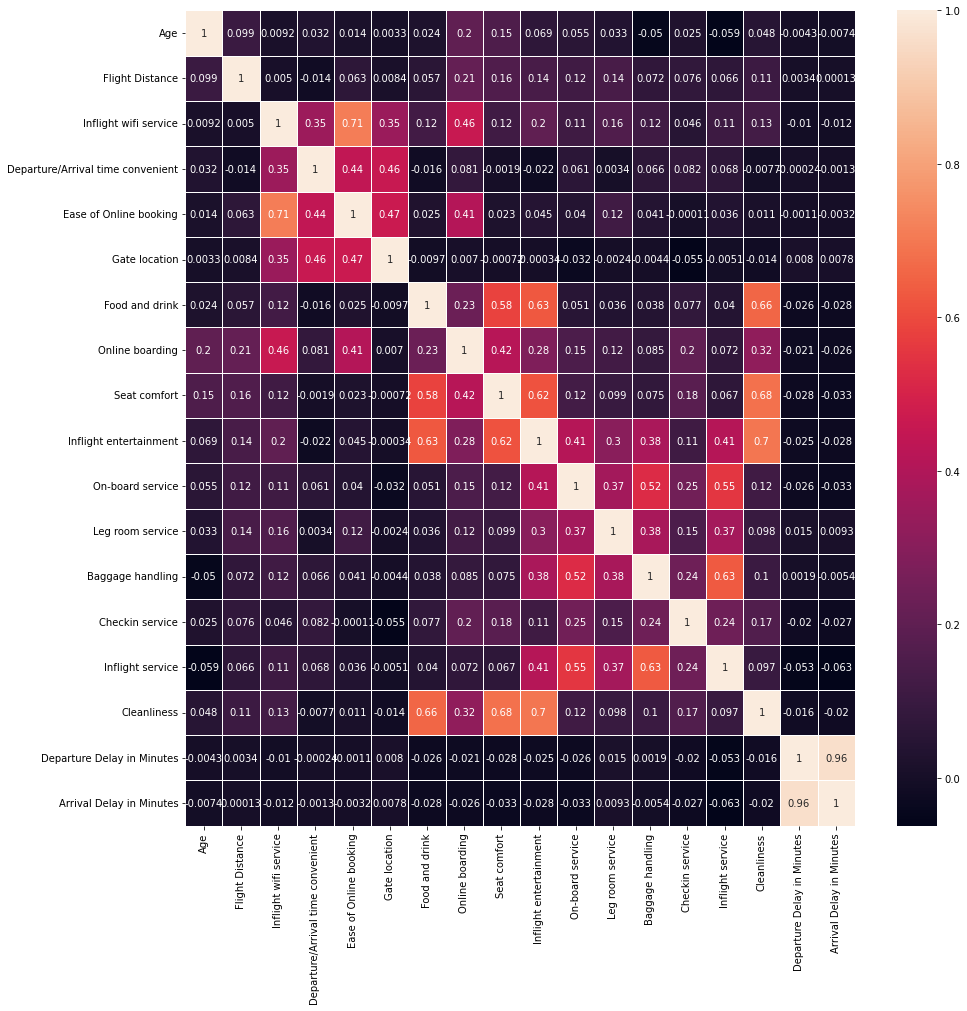

In [11]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

Missing values

In [12]:
df.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

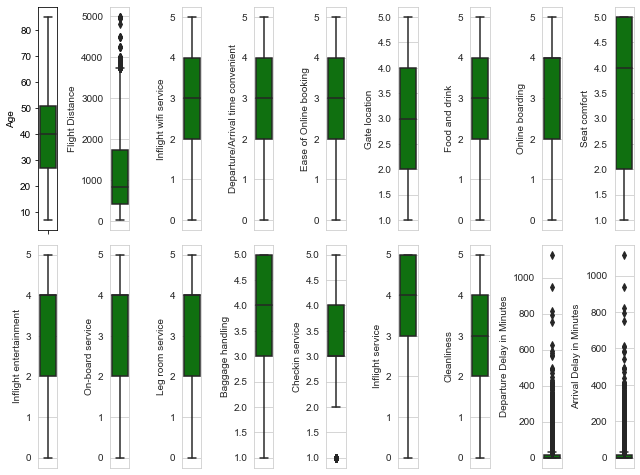

In [15]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
l = numeric_columns.columns.values
number_of_columns=9
number_of_rows = 2
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y=numeric_columns[l[i]], color='green')
    plt.tight_layout()
plt.show()

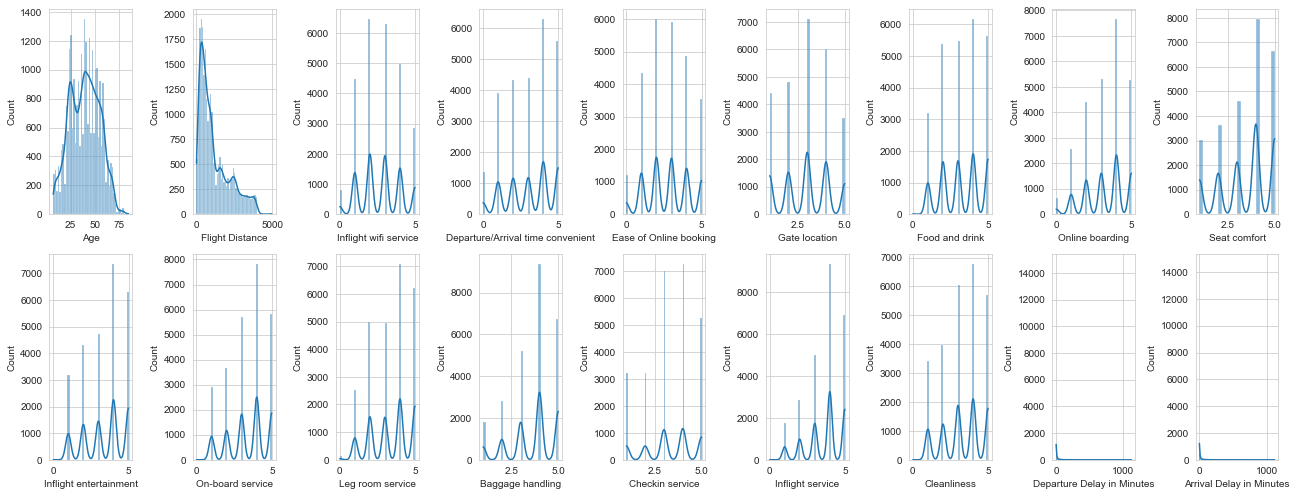

In [16]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.histplot(df[l[i]],kde=True) 
    plt.tight_layout()
plt.show()

Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

In [18]:
df['Gender'] = lb.fit_transform(df['Gender'])
df['Customer Type'] = lb.fit_transform(df['Customer Type'])
df['Type of Travel'] = lb.fit_transform(df['Type of Travel'])
df['Class'] = lb.fit_transform(df['Class'])
df['satisfaction'] = lb.fit_transform(df['satisfaction'])

In [19]:
feature_df = df.drop(columns=['satisfaction'])
feature_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,52,0,1,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,44.0
1,0,0,36,0,0,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,0.0
2,1,1,20,0,1,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,0.0
3,1,0,44,0,0,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,6.0
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,1,34,0,0,526,3,3,3,1,...,4,4,3,2,4,4,5,4,0,0.0
25972,1,0,23,0,0,646,4,4,4,4,...,4,4,4,5,5,5,5,4,0,0.0
25973,0,0,17,1,1,828,2,5,1,5,...,2,2,4,3,4,5,4,2,0,0.0
25974,1,0,14,0,0,1127,3,3,3,3,...,4,4,3,2,5,4,5,4,0,0.0


In [20]:
label_df = df['satisfaction']
label_df

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 25893, dtype: int32

Splitting Dataset

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_df, label_df,test_size=0.3)

In [22]:
print("The size of Training 'X' is", x_train.shape)
print("The size of Training 'y' is", y_train.shape)
print("The size of Testing 'X' is", x_test.shape)
print("The size of Testing 'y' is", y_test.shape)

The size of Training 'X' is (18125, 22)
The size of Training 'y' is (18125,)
The size of Testing 'X' is (7768, 22)
The size of Testing 'y' is (7768,)


Logistic Regression Model Training

In [26]:
from sklearn.linear_model import LogisticRegression

In [31]:
LogisticModel = LogisticRegression(solver='lbfgs', max_iter=1000)
LogisticModel.fit(x_train, y_train)

c:\Users\vipin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [32]:
logistic_y_predict = LogisticModel.predict(x_test)

Confusion Matrix for Logistic Regression


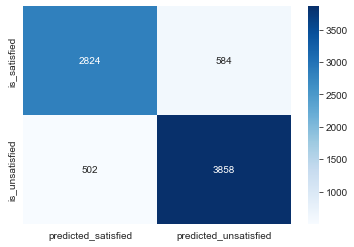

In [33]:
lr_ypred = LogisticModel.predict(x_test)

cm_lr = np.array(confusion_matrix(y_test, lr_ypred, labels=[1,0]))

confusion_lr = pd.DataFrame(cm_lr, index=['is_satisfied', 'is_unsatisfied'], columns=['predicted_satisfied', 'predicted_unsatisfied'])

print("Confusion Matrix for Logistic Regression")
sns.heatmap(confusion_lr, annot=True, cmap="Blues", fmt='g')
plt.show()

In [34]:
print(classification_report(y_test, lr_ypred))
lr_Acc = accuracy_score(lr_ypred, y_test)
print('Logistic Regression accuracy: {:.2f}%'.format(lr_Acc*100))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4360
           1       0.85      0.83      0.84      3408

    accuracy                           0.86      7768
   macro avg       0.86      0.86      0.86      7768
weighted avg       0.86      0.86      0.86      7768

Logistic Regression accuracy: 86.02%


ROC Curve

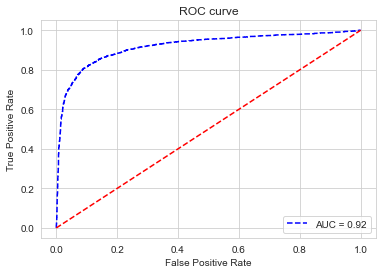

In [42]:
lr_proba = LogisticModel.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, lr_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, linestyle='--',)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()